<a href="https://colab.research.google.com/github/abhi25031998/Abhishek_INFO5731_Spring2025/blob/main/INFO5731_Assignment_3_(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [29]:
import re
import pandas as pd
from collections import defaultdict


file_path = "/content/cleaned_LLMs_Tweets.csv"
df = pd.read_csv(file_path)


tweets = df["tweetText"].dropna().tolist()


def tokenize(text):
    text = text.lower()
    # Use regex to split words, remove punctuation, etc.
    words = re.findall(r'\b\w+\b', text)
    return words

# Function to generate N-grams
def generate_ngrams(tokens, n):
    ngrams = []
    for i in range(len(tokens) - n + 1):
        ngrams.append(tuple(tokens[i:i + n]))
    return ngrams


def count_ngrams(dataset, n):
    ngram_freq = defaultdict(int)
    for tweet in dataset:
        tokens = tokenize(tweet)
        ngrams = generate_ngrams(tokens, n)
        for ngram in ngrams:
            ngram_freq[ngram] += 1
    return ngram_freq


def calculate_bigram_probabilities(dataset):
    bigram_freq = defaultdict(int)
    unigram_freq = defaultdict(int)

    for tweet in dataset:
        tokens = tokenize(tweet)
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i + 1])
            unigram_freq[tokens[i]] += 1
            bigram_freq[bigram] += 1

    bigram_probabilities = defaultdict(float)
    for bigram, count in bigram_freq.items():
        w1 = bigram[0]
        if unigram_freq[w1] > 0:
            bigram_probabilities[bigram] = count / unigram_freq[w1]

    return bigram_probabilities


def extract_noun_phrases(dataset):
    noun_phrases = defaultdict(int)
    for tweet in dataset:
        tokens = tokenize(tweet)
        # Consider words that are longer than 3 characters as noun phrases (simplified assumption)
        for token in tokens:
            if len(token) > 3:  # Simple filter for noun-like words (real extraction would need POS tagging)
                noun_phrases[token] += 1
    return noun_phrases

# Calculate relative frequency of each noun phrase across all tweets
def calculate_noun_phrase_probabilities(dataset, noun_phrases):
    max_freq = max(noun_phrases.values())
    relative_probabilities = {}

    for tweet in dataset:
        tokens = tokenize(tweet)
        tweet_freq = defaultdict(int)

        # Count noun phrases in the tweet
        for token in tokens:
            if len(token) > 3:  # Again, simple assumption for noun phrases
                tweet_freq[token] += 1

        # Calculate relative probabilities for the tweet
        relative_probabilities_for_tweet = {}
        for noun_phrase, count in tweet_freq.items():
            relative_probabilities_for_tweet[noun_phrase] = count / max_freq

        relative_probabilities[tweet] = relative_probabilities_for_tweet

    return relative_probabilities

bigram_probabilities = calculate_bigram_probabilities(documents)
print('\nBigram Probabilities:')
for bigram, probability in bigram_probabilities.items():
    print(f'{bigram}: {probability}')
noun_phrases = extract_noun_phrases(tweets)



relative_probabilities = calculate_noun_phrase_probabilities(tweets, noun_phrases)


noun_phrase_list = list(noun_phrases.keys())


data = []
for tweet in tweets:
    tweet_probabilities = relative_probabilities.get(tweet, {})
    row = []
    for noun_phrase in noun_phrase_list:
        row.append(tweet_probabilities.get(noun_phrase, 0))  # If noun phrase not found, use 0
    data.append(row)

# Create a DataFrame
df_noun_phrase_probabilities = pd.DataFrame(data, columns=noun_phrase_list, index=[f"Tweet {i+1}" for i in range(len(tweets))])


print("\nRelative Probabilities for Noun Phrases (Tweets x Noun Phrases):")
print(df_noun_phrase_probabilities)



Bigram Probabilities:
('how', 'llms'): 0.2727272727272727
('llms', 'work'): 0.020618556701030927
('work', 'pre'): 0.2
('pre', 'training'): 1.0
('training', 'to'): 0.14285714285714285
('to', 'post'): 0.02857142857142857
('post', 'training'): 0.4
('training', 'neural'): 0.14285714285714285
('neural', 'networks'): 1.0
('networks', 'hallucinations'): 0.5
('hallucinations', 'and'): 0.5
('and', 'inference'): 0.025
('inference', 'ai'): 0.25
('ai', 'socialmedia'): 0.014084507042253521
('socialmedia', 'engineer'): 0.5
('engineer', 'startups'): 1.0
('startups', 'techforgood'): 0.5
('techforgood', 'socialmedia'): 1.0
('socialmedia', 'datascience'): 0.5
('datascience', 'machinelearning'): 0.2
('machinelearning', 'iot'): 0.3333333333333333
('iot', 'iiot'): 0.3333333333333333
('iiot', 'python'): 1.0
('python', 'javascript'): 1.0
('javascript', 'marketing'): 1.0
('marketing', '100daysofcode'): 1.0
('100daysofcode', 'https'): 1.0
('https', 't'): 1.0
('t', 'co'): 0.9224137931034483
('co', 'towdiujk0i'

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [30]:
import spacy
from collections import Counter, defaultdict
import math


nlp = spacy.load("en_core_web_sm")

# Read the dataset
dataset_path = ('/content/cleaned_LLMs_Tweets.csv')
with open(dataset_path, "r") as file:
    documents = file.readlines()

documents = [nlp(doc.lower()) for doc in documents]


tokenized_docs = [[token.text for token in doc if not token.is_punct] for doc in documents]


def compute_tf(doc):
    term_count = Counter(doc)
    total_terms = len(doc)
    return {term: count / total_terms for term, count in term_count.items()}

tf_matrix = [compute_tf(doc) for doc in tokenized_docs]


idf_count = Counter(term for doc in tokenized_docs for term in set(doc))
num_docs = len(tokenized_docs)
idf = {term: math.log(num_docs / (1 + count)) for term, count in idf_count.items()}


tf_idf_matrix = [{term: tf * idf[term] for term, tf in tf_doc.items()} for tf_doc in tf_matrix]


for i, doc in enumerate(tf_idf_matrix[:5]):
    print(f"Document {i + 1} TF-IDF:")
    for term, value in list(doc.items())[:10]:
        print(f"{term}: {value:.4f}")
    print("-")








Document 1 TF-IDF:
tweet_id: 0.7844
user_id: 0.7844
tweet_time: 0.7844
tweettext: 0.7844

: -0.0020
-
Document 2 TF-IDF:
1892387115855446273,1241749653013630976,2025: 0.1352
02: 0.0000
20: 0.0765
01:33:41: 0.1352
+: 0.0000
00:00,llm: 0.1036
work: 0.0920
pretraining: 0.1352
posttraining: 0.1213
neural: 0.1352
-
Document 3 TF-IDF:
1892383265270489567,1667995528490020867,2025: 0.2179
02: 0.0000
20: 0.1232
01:18:23: 0.2179
+: 0.0000
00:00,n: 0.2179
detail: 0.2179
check: 0.1954
paper: 0.1954
website: 0.2179
-
Document 4 TF-IDF:
1892378135657926828,737142202481016832,2025: 0.0726
02: 0.0000
20: 0.0411
00:58:00: 0.0726
+: 0.0000
00:00,enilev: 0.0726
iamvictordey: 0.1453
observer: 0.0726
jblefevre: 0.0726
ianljones: 0.0726
-
Document 5 TF-IDF:
1892375804622901331,1671957938884472832,2025: 0.1401
02: 0.0000
20: 0.0792
00:48:45: 0.1401
+: 0.0000
00:00,deepseeks: 0.1401
nsa: 0.1401
outperforms: 0.1401
full: 0.1153
attention: 0.1256
-


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


file_path = "/content/cleaned_LLMs_Tweets.csv"
df = pd.read_csv(file_path)

documents = df["tweetText"].dropna().tolist()

# Define a query
query = "Large language models AI research"

vectorizer = TfidfVectorizer()


tfidf_matrix = vectorizer.fit_transform(documents + [query])

cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()


ranked_docs = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)


for rank, (index, score) in enumerate(ranked_docs, start=1):
    print(f"Rank {rank}: Document {index} (Score: {score:.4f})")


Rank 1: Document 65 (Score: 0.2559)
Rank 2: Document 8 (Score: 0.2379)
Rank 3: Document 93 (Score: 0.2236)
Rank 4: Document 30 (Score: 0.2175)
Rank 5: Document 31 (Score: 0.2175)
Rank 6: Document 41 (Score: 0.2175)
Rank 7: Document 62 (Score: 0.2143)
Rank 8: Document 76 (Score: 0.1757)
Rank 9: Document 77 (Score: 0.1415)
Rank 10: Document 3 (Score: 0.1065)
Rank 11: Document 51 (Score: 0.1042)
Rank 12: Document 58 (Score: 0.0772)
Rank 13: Document 43 (Score: 0.0708)
Rank 14: Document 42 (Score: 0.0705)
Rank 15: Document 39 (Score: 0.0662)
Rank 16: Document 10 (Score: 0.0654)
Rank 17: Document 56 (Score: 0.0450)
Rank 18: Document 81 (Score: 0.0438)
Rank 19: Document 21 (Score: 0.0431)
Rank 20: Document 37 (Score: 0.0369)
Rank 21: Document 36 (Score: 0.0349)
Rank 22: Document 15 (Score: 0.0348)
Rank 23: Document 72 (Score: 0.0338)
Rank 24: Document 25 (Score: 0.0290)
Rank 25: Document 61 (Score: 0.0282)
Rank 26: Document 94 (Score: 0.0278)
Rank 27: Document 20 (Score: 0.0271)
Rank 28: Doc

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [35]:
import string
import numpy as np
import gensim
from gensim.models import Word2Vec



def preprocess_text(text):

    words = text.split()

    return words


file_path = "/content/cleaned_LLMs_Tweets.csv"
df = pd.read_csv(file_path)

documents = df["tweetText"].dropna().tolist()

preprocessed_corpus = [preprocess_text(sentence) for sentence in documents]


model = Word2Vec(sentences=preprocessed_corpus, vector_size=300, window=5, min_count=1, sg=0)


model.save("word2vec_model_300dim.model")



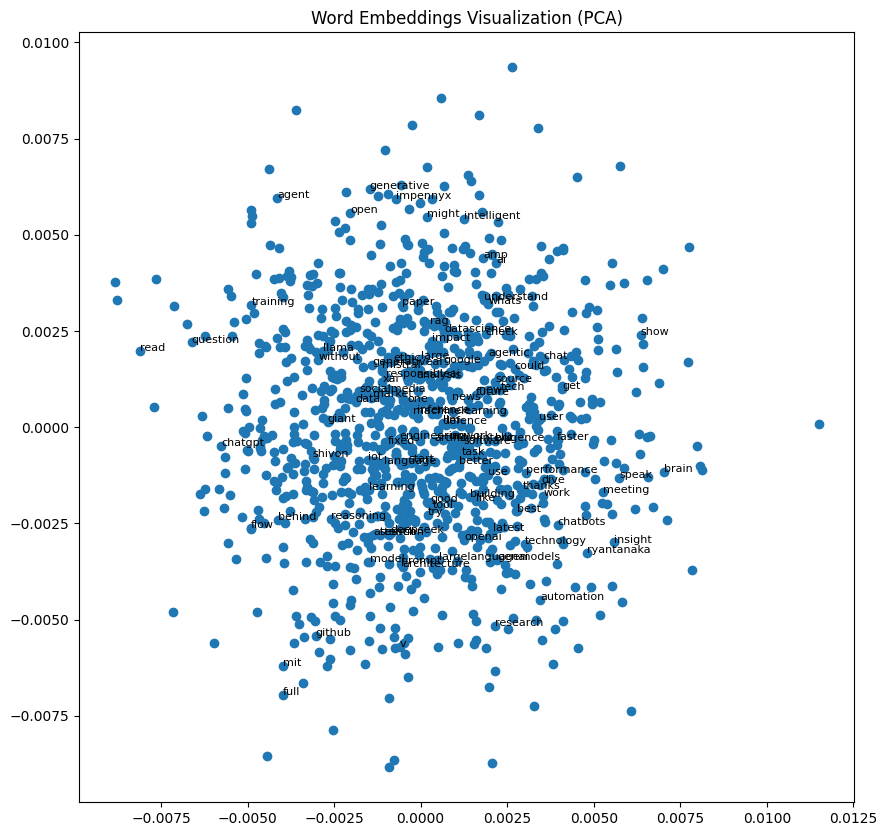

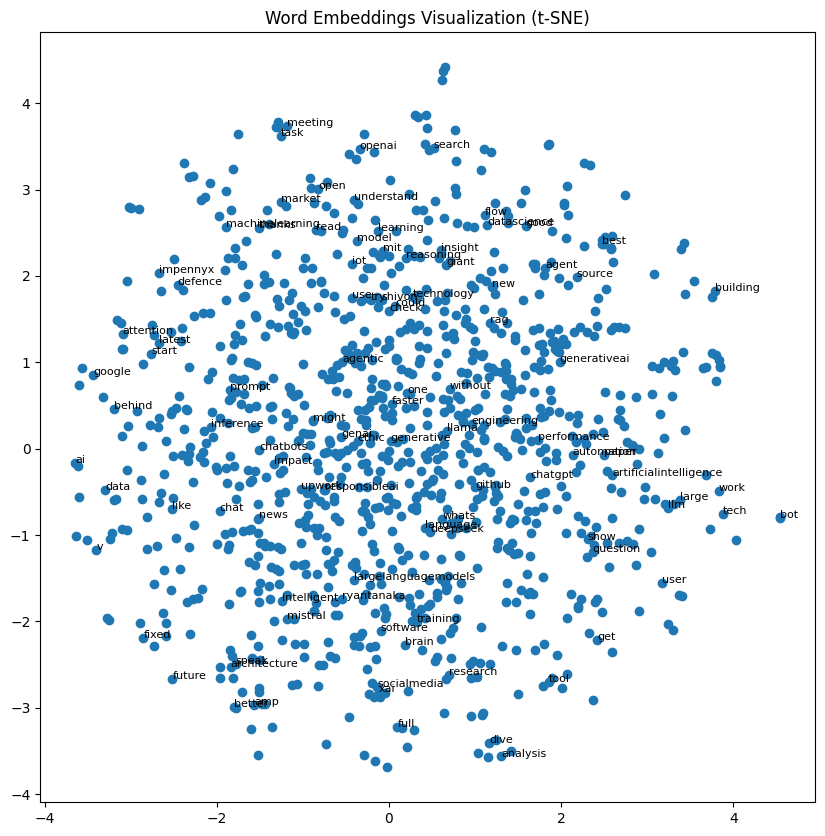

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np


words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Plot the PCA result
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(words[:100]):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)

plt.title("Word Embeddings Visualization (PCA)")
plt.show()


tsne = TSNE(n_components=2, perplexity=30, max_iter=300)
tsne_result = tsne.fit_transform(word_vectors)


plt.figure(figsize=(10, 10))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])


for i, word in enumerate(words[:100]):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=8)

plt.title("Word Embeddings Visualization (t-SNE)")
plt.show()


In [38]:
from sklearn.metrics.pairwise import cosine_similarity


def get_cosine_similarity(word1, word2, model):
    vec1 = model.wv[word1].reshape(1, -1)
    vec2 = model.wv[word2].reshape(1, -1)

    # Compute cosine similarity
    similarity = cosine_similarity(vec1, vec2)
    return similarity[0][0]


word_pairs = [
   ("llm", "future"),
    ("deepseeks", "process"),
    ("machinelearning", "datascience"),
    ("data", "show"),
    ("language", "information")
]


for word1, word2 in word_pairs:
    similarity = get_cosine_similarity(word1, word2, model)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")


Cosine similarity between 'llm' and 'future': 0.1034
Cosine similarity between 'deepseeks' and 'process': -0.0184
Cosine similarity between 'machinelearning' and 'datascience': 0.0383
Cosine similarity between 'data' and 'show': -0.0472
Cosine similarity between 'language' and 'information': 0.0815


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/abhi25031998/Abhishek_INFO5731_Spring2025/blob/main/annotated_LLMs_tweets.csv



Given the dataset structure, we will do Sentiment Analysis on the given text. Thus from the dataset column name (sentiment) it is apparent that it’s already being annotated for sentiment classification. Sentiment Analysis is concerned with determining whether a given text expresses positive, negative, or neutral opinion; and this dataset has a suitable task of doing that.

In other words, this dataset’s labeling schema is three sentiment categories: positive, negative, or neutral. The text accommodated in each tweet is classified depending on the emotion they convey. If labels are 'Positive' they indicate that opinions are favorable, if they say 'Negative' it means it is critical or disliked, and if they are 'Neutral' it is an objective or mixed form without expression of 'pos' or 'neg'.

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

I felt the assignment is bit challenging. Generating code and Fixing the errors in codes was challenging for me but at the same time I enjoyed writing code. I felt the given time is good enough to complete this kind of assignment.